In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import os

## Prepare data

In [120]:
data = pd.read_csv(os.path.join(os.getcwd(), 'ecoli.data'), names=['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 
                                                                   'aac', 'alm1', 'alm2', 'class'])

In [121]:
data.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [122]:
data.drop('sequence_name', axis=1, inplace=True)
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(201, 7) (67, 7) (68, 7)
(201,) (67,) (68,)


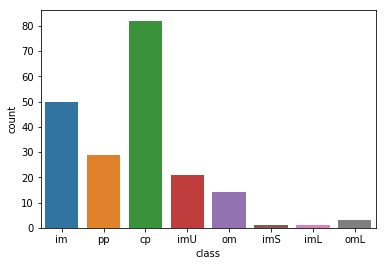

In [123]:
sns.countplot(y_train)

In [124]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [125]:
y_encoder = LabelEncoder()
y_encoder.fit(y_train)

LabelEncoder()

In [126]:
y_encoder.classes_

array(['cp', 'im', 'imL', 'imS', 'imU', 'om', 'omL', 'pp'], dtype=object)

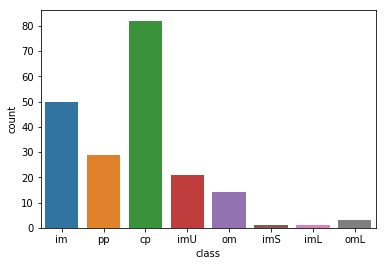

In [127]:
sns.countplot(y_train)

In [129]:
y_train = to_categorical(y_encoder.transform(y_train))
y_val = to_categorical(y_encoder.transform(y_val))
y_test = to_categorical(y_encoder.transform(y_test))

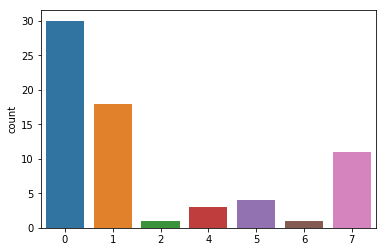

In [132]:
sns.countplot(y_test.argmax(axis=1))

In [131]:
['cp', 'im', '', '', 'imU', 'om', 'omL', 'pp']

array(['cp', 'im', 'imL', 'imS', 'imU', 'om', 'omL', 'pp'], dtype=object)

In [88]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()

In [89]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Models

In [90]:
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(7,), kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('sigmoid'),
    keras.layers.Dense(8, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('softmax')
])
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
activation_3 (Activation)    (None, 8)                 0         
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [92]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [93]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=[X_val, y_val], callbacks=[early_stop])

Train on 201 samples, validate on 67 samples
Epoch 1/1000
201/201 [==============================] - 0s 2ms/step - loss: 2.2379 - acc: 0.0945 - val_loss: 2.2731 - val_acc: 0.0448
Epoch 2/1000
201/201 [==============================] - 0s 70us/step - loss: 2.2035 - acc: 0.1294 - val_loss: 2.2399 - val_acc: 0.0448
Epoch 3/1000
201/201 [==============================] - 0s 73us/step - loss: 2.1718 - acc: 0.1692 - val_loss: 2.2070 - val_acc: 0.0597
Epoch 4/1000
201/201 [==============================] - 0s 93us/step - loss: 2.1392 - acc: 0.1940 - val_loss: 2.1755 - val_acc: 0.0746
Epoch 5/1000
201/201 [==============================] - 0s 111us/step - loss: 2.1089 - acc: 0.1990 - val_loss: 2.1456 - val_acc: 0.0746
Epoch 6/1000
201/201 [==============================] - 0s 127us/step - loss: 2.0790 - acc: 0.1891 - val_loss: 2.1168 - val_acc: 0.0896
Epoch 7/1000
201/201 [==============================] - 0s 130us/step - loss: 2.0509 - acc: 0.1990 - val_loss: 2.0890 - val_acc: 0.0896
Epoch 8/

201/201 [==============================] - 0s 98us/step - loss: 1.3680 - acc: 0.6219 - val_loss: 1.4171 - val_acc: 0.5672
Epoch 61/1000
201/201 [==============================] - 0s 99us/step - loss: 1.3625 - acc: 0.6219 - val_loss: 1.4127 - val_acc: 0.5672
Epoch 62/1000
201/201 [==============================] - 0s 110us/step - loss: 1.3569 - acc: 0.6219 - val_loss: 1.4089 - val_acc: 0.5672
Epoch 63/1000
201/201 [==============================] - 0s 115us/step - loss: 1.3515 - acc: 0.6219 - val_loss: 1.4048 - val_acc: 0.5672
Epoch 64/1000
201/201 [==============================] - 0s 95us/step - loss: 1.3464 - acc: 0.6269 - val_loss: 1.4006 - val_acc: 0.5672
Epoch 65/1000
201/201 [==============================] - 0s 98us/step - loss: 1.3412 - acc: 0.6269 - val_loss: 1.3955 - val_acc: 0.5672
Epoch 66/1000
201/201 [==============================] - 0s 111us/step - loss: 1.3364 - acc: 0.6269 - val_loss: 1.3905 - val_acc: 0.5672
Epoch 67/1000
201/201 [==============================] - 0s

Epoch 120/1000
201/201 [==============================] - 0s 106us/step - loss: 1.1694 - acc: 0.6517 - val_loss: 1.2397 - val_acc: 0.5821
Epoch 121/1000
201/201 [==============================] - 0s 115us/step - loss: 1.1673 - acc: 0.6567 - val_loss: 1.2377 - val_acc: 0.5970
Epoch 122/1000
201/201 [==============================] - 0s 104us/step - loss: 1.1655 - acc: 0.6567 - val_loss: 1.2357 - val_acc: 0.5970
Epoch 123/1000
201/201 [==============================] - 0s 89us/step - loss: 1.1636 - acc: 0.6617 - val_loss: 1.2337 - val_acc: 0.5970
Epoch 124/1000
201/201 [==============================] - 0s 87us/step - loss: 1.1618 - acc: 0.6617 - val_loss: 1.2317 - val_acc: 0.5970
Epoch 125/1000
201/201 [==============================] - 0s 91us/step - loss: 1.1601 - acc: 0.6617 - val_loss: 1.2301 - val_acc: 0.5970
Epoch 126/1000
201/201 [==============================] - 0s 95us/step - loss: 1.1583 - acc: 0.6667 - val_loss: 1.2279 - val_acc: 0.5970
Epoch 127/1000
201/201 [==============

201/201 [==============================] - 0s 102us/step - loss: 1.0930 - acc: 0.7313 - val_loss: 1.1651 - val_acc: 0.6716
Epoch 180/1000
201/201 [==============================] - 0s 109us/step - loss: 1.0922 - acc: 0.7313 - val_loss: 1.1641 - val_acc: 0.6716
Epoch 181/1000
201/201 [==============================] - 0s 106us/step - loss: 1.0916 - acc: 0.7313 - val_loss: 1.1626 - val_acc: 0.6716
Epoch 182/1000
201/201 [==============================] - 0s 121us/step - loss: 1.0907 - acc: 0.7313 - val_loss: 1.1628 - val_acc: 0.6716
Epoch 183/1000
201/201 [==============================] - 0s 124us/step - loss: 1.0899 - acc: 0.7313 - val_loss: 1.1621 - val_acc: 0.6716
Epoch 184/1000
201/201 [==============================] - 0s 145us/step - loss: 1.0891 - acc: 0.7313 - val_loss: 1.1609 - val_acc: 0.6716
Epoch 185/1000
201/201 [==============================] - 0s 138us/step - loss: 1.0883 - acc: 0.7313 - val_loss: 1.1597 - val_acc: 0.6866
Epoch 186/1000
201/201 [=========================

201/201 [==============================] - 0s 90us/step - loss: 1.0596 - acc: 0.7313 - val_loss: 1.1268 - val_acc: 0.6866
Epoch 239/1000
201/201 [==============================] - 0s 111us/step - loss: 1.0592 - acc: 0.7313 - val_loss: 1.1255 - val_acc: 0.6866
Epoch 240/1000
201/201 [==============================] - 0s 76us/step - loss: 1.0591 - acc: 0.7313 - val_loss: 1.1249 - val_acc: 0.6866
Epoch 241/1000
201/201 [==============================] - 0s 92us/step - loss: 1.0585 - acc: 0.7313 - val_loss: 1.1253 - val_acc: 0.6866
Epoch 242/1000
201/201 [==============================] - 0s 120us/step - loss: 1.0582 - acc: 0.7313 - val_loss: 1.1250 - val_acc: 0.6866
Epoch 243/1000
201/201 [==============================] - 0s 111us/step - loss: 1.0578 - acc: 0.7313 - val_loss: 1.1247 - val_acc: 0.6866
Epoch 244/1000
201/201 [==============================] - 0s 134us/step - loss: 1.0575 - acc: 0.7313 - val_loss: 1.1238 - val_acc: 0.7015
Epoch 245/1000
201/201 [============================

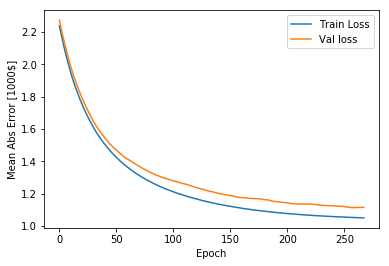

In [94]:
plot_history(history)

In [95]:
pred = np.round(model.predict(X_test).argmax(axis=1).reshape(-1,))
accuracy_score(pred, y_test.argmax(axis=1))

0.8235294117647058

In [96]:
sum(y_test.argmax(axis=1) == 0)

30

[[30  0  0  0  0  0  0]
 [ 2 16  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 1  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0 10]]


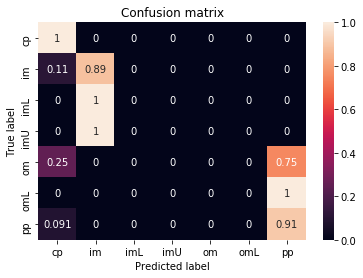

In [133]:
mat = confusion_matrix(y_test.argmax(axis=1), pred)
print(mat)
cm = mat / np.sum(mat, axis=1).reshape(-1, 1)
plot_confusion_matrix(cm, classes=['cp', 'im', 'imL','imU', 'om', 'omL', 'pp'])